In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate as c1d

import obspy

from multilaterate import get_loci, get_locus
from spectrogram import enh, spect_seis, spect_shum

from map_tools import convert_lonlat

import math
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def normxcorr(a, t):

    # (one-time) normalization of template
    t = t - np.mean(t)
    norm = math.sqrt(np.sum(np.square(t)))
    t = t / norm

    # create filter to sum values under template
    sum_filter = np.ones(np.shape(t))

    #also want squared values
    aa = np.square(a)

    # compute sums of values and sums of values squared under template
    a_sum = c1d(a, sum_filter, mode='valid')
    aa_sum = c1d(aa, sum_filter, mode='valid')
    # Note:  The above two lines could be made more efficient by
    #        exploiting the fact that sum_filter is separable.
    #        Even better would be to take advantage of integral images

    # compute correlation, 't' is normalized, 'a' is not (yet)
    numer = c1d(a, t, mode='valid')
    # (each time) normalization of the window under the template
    denom = np.sqrt(aa_sum - np.square(a_sum)/np.size(t))

    nxcorr = numer/denom

    return nxcorr

1418
WTA00
STA02
ETA00
NTA02
creating figures


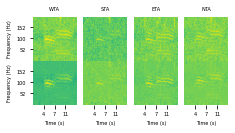

[ 0.15890239]
[ 0.2927046]
[ 0.28093648]
1427
WTA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


STA02
ETA00
NTA02
creating figures


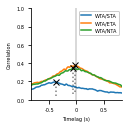

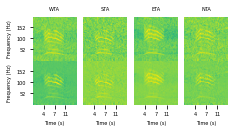

[ 0.28783928]
[ 0.38057293]
[ 0.27936336]
1429
ETA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


WTA00
STA02
NTA02
creating figures


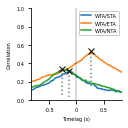

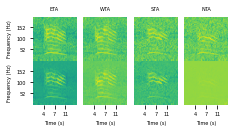

[ 0.3942439]
[ 0.32757625]
[ 0.1836308]
1448
ETA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


WTA00
STA02
NTA02
creating figures


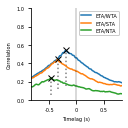

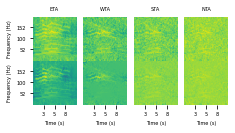

[ 0.14410918]
[ 0.12840266]
[ 0.11947213]
1525
WTA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


ETA00
STA02
NTA02
creating figures


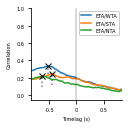

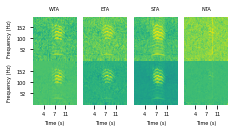

[ 0.34717041]
[ 0.4185994]
[ 0.08427394]
2039
NTA02


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


WTA00
ETA00
STA02
creating figures


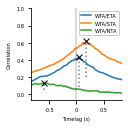

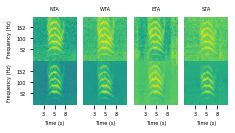

[ 0.76076584]
[ 0.72686686]
[ 0.59513505]
4117
ETA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


STA02
WTA00
NTA02
creating figures


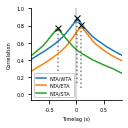

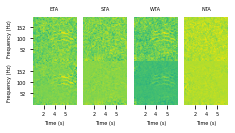

[ 0.07213663]
[ 0.1868016]
[ 0.05386406]
4740
WTA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


ETA00
NTA02
STA02
creating figures


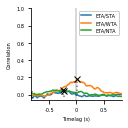

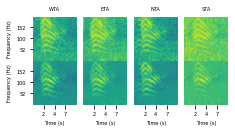

[ 0.68091582]
[ 0.5503073]
[ 0.55231848]
4772
WTA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


ETA00
NTA02
STA02
creating figures


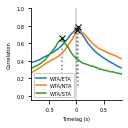

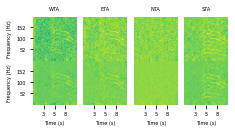

[ 0.14073611]
[ 0.05261154]
[ 0.13590036]
5493
ETA00


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


WTA00
NTA02
STA02
creating figures


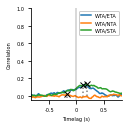

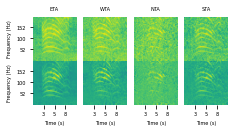

[ 0.53139433]
[ 0.26440374]
[ 0.50839731]
7564
NTA02


/mnt/c/Users/pleas/Google Drive/mpala/run_analysis_polished_revision/spectrogram.py:5: FutureWarning: deprecation warning: the default order of the structure tensor values will be "row-column" instead of "xy" starting in skimage version 0.20. Use order="rc" or order="xy" to set this explicitly.  (Specify order="xy" to maintain the old behavior.)
  A1,A2,A3 = structure_tensor(spectrogram,sigma=sigma,mode='nearest')


ETA00
WTA00
STA02
creating figures


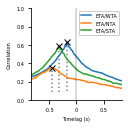

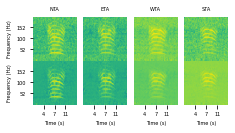

[ 0.43597167]
[ 0.43205529]
[ 0.3134925]


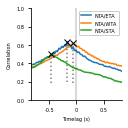

In [6]:


df = pd.read_csv('data.csv')
for j,row in df.iterrows():
    
    event_num = row['event_num']
    print(event_num)
    timestamp = obspy.UTCDateTime(row['timepoint'])
    
    peak = 0
    prominence = []

    signals_norm = []
    signals_enhanced = []
    
    stationlist = [row['station0_shumb'],row['station1_shumb'],row['station2_shumb'],row['station3_shumb']]

    for i,station in enumerate(stationlist):
        print(station)
        
        file = str(event_num)+'_'+station+'_acoustic.mseed'
        shumb = obspy.read('./data/'+file, format="MSEED", dtype=np.float32)
        data_shumb = np.array([tr.data for tr in shumb]).transpose()
        times_shumb = shumb[0].times()

        frequencies_shumb, time_shumb, powerSpectrum_shumb = sp.signal.spectrogram(data_shumb[:,0], fs=spect_shum['fs'], nperseg = spect_shum['nperseg'], noverlap=spect_shum['noverlap'], nfft=spect_shum['NFFT'])
        timestep = time_shumb[1]-time_shumb[0]
        fullsignal_shumb = 10*np.log10(powerSpectrum_shumb)[0:50,:]
        fullsignal_shumb_norm = fullsignal_shumb - np.mean(fullsignal_shumb, axis=1, keepdims=True)
        fullsignal_shumb_enhanced = enh(fullsignal_shumb_norm)

        signals_norm.append(fullsignal_shumb_norm)
        signals_enhanced.append(fullsignal_shumb_enhanced)

    aspectratio=1.

    print('creating figures')

    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(8.8*cm,4.8*cm))

    for i, (station, fullsignal_norm, fullsignal_enhanced) in enumerate(zip(stationlist, signals_norm, signals_enhanced)):


        ax = plt.subplot(2,4,i+1)
        im = ax.imshow(fullsignal_norm, origin='lower')
        ratio_default=(ax.get_xlim()[1]-ax.get_xlim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])
        ax.set_aspect(ratio_default*aspectratio)
        if i == 0:
            ax.set_yticks([12.5,25,37.5])
            ax.set_yticklabels([round(frequencies_shumb[13]),round(frequencies_shumb[25]),round(frequencies_shumb[38])], fontsize=5)
            plt.ylabel('Frequency (Hz)', fontsize=5)
        else:
            ax.set_yticks([])

        num_time = len(time_shumb) * timestep
        steps = len(time_shumb)
        ax.set_xticks([])
        plt.title(station[:3], fontsize=5)
        plt.box(on=None)


        ax = plt.subplot(2,4,i+5)
        im = ax.imshow(fullsignal_enhanced, origin='lower')
        ratio_default=(ax.get_xlim()[1]-ax.get_xlim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])
        ax.set_aspect(ratio_default*aspectratio)
        if i == 0:
            ax.set_yticks([12.5,25,37.5])
            ax.set_yticklabels([round(frequencies_shumb[13]),round(frequencies_shumb[25]),round(frequencies_shumb[38])], fontsize=5)
            plt.ylabel('Frequency (Hz)',fontsize=5)
        else:
            ax.set_yticks([])
        ax.set_xticks([round(0.25*steps), round(0.5*steps), round(0.75*steps)])
        ax.set_xticklabels([round(0.25*num_time), round(0.5*num_time), round(0.75*num_time)], fontsize=5)
        plt.xlabel('Time (s)',fontsize=5)
        #im.set_clim(-10,10)
        plt.box(on=None)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.0000001, hspace=0.01)
    #plt.savefig('./signals/'+str(row['event_num'])+'_signals_acoustic.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.savefig('./signals/'+str(row['event_num'])+'_signals_acoustic.svg', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()    
    
    fullsignal_long =  np.pad(signals_enhanced[0], ((0,0),(500,500)), 'edge')
    
    
    enh_1 = normxcorr(fullsignal_long, signals_enhanced[1]).mean(axis=0)
    enh_2 = normxcorr(fullsignal_long, signals_enhanced[2]).mean(axis=0)
    enh_3 = normxcorr(fullsignal_long, signals_enhanced[3]).mean(axis=0)

    correlations = [0, (np.argmax(enh_1)-500)*timestep, (np.argmax(enh_2)-500)*timestep, (np.argmax(enh_3)-500)*timestep]

    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(4.8*cm,4.8*cm))
    ax= plt.subplot(1,1,1)
    ax.plot(enh_1, label=stationlist[0][:3]+'/'+stationlist[1][:3], color='tab:blue')
    ax.plot(enh_2, label=stationlist[0][:3]+'/'+stationlist[2][:3], color='tab:orange')
    ax.plot(enh_3, label=stationlist[0][:3]+'/'+stationlist[3][:3], color='tab:green')

    x = enh_1
    peaks, properties = sp.signal.find_peaks(x, prominence=0, width=50)
    peak = peak+len(peaks[(peaks>250) & (peaks<750)])
    print(properties['prominences'][(peaks>250) & (peaks<750)])
    if len(properties['prominences'][(peaks>250) & (peaks<750)])==1:
        prominence.append(properties['prominences'][(peaks>250) & (peaks<750)])
    else:
        prominence.append(0)
    ax.plot(peaks, x[peaks], "x", color='black')
    ax.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
               ymax = x[peaks], color='gray', linestyles='dotted')

    x = enh_2
    peaks, properties = sp.signal.find_peaks(x, prominence=0, width=50)
    peak = peak+len(peaks[(peaks>250) & (peaks<750)])
    print(properties['prominences'][(peaks>250) & (peaks<750)])
    if len(properties['prominences'][(peaks>250) & (peaks<750)])==1:
        prominence.append(properties['prominences'][(peaks>250) & (peaks<750)])
    else:
        prominence.append(0)
    ax.plot(peaks, x[peaks], "x", color='black')
    ax.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
               ymax = x[peaks], color='gray', linestyles='dotted')

    x = enh_3
    peaks, properties = sp.signal.find_peaks(x, prominence=0, width=50)
    peak = peak+len(peaks[(peaks>250) & (peaks<750)])
    print(properties['prominences'][(peaks>250) & (peaks<750)])
    if len(properties['prominences'][(peaks>250) & (peaks<750)])==1:
        prominence.append(properties['prominences'][(peaks>250) & (peaks<750)])
    else:
        prominence.append(0)
    ax.plot(peaks, x[peaks], "x", color='black')
    ax.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
               ymax = x[peaks], color='gray', linestyles='dotted')

    plt.ylabel('Correlation', fontsize=5)
    ax.axvline(x=500, ymin=0, ymax=1.0, alpha=0.2, color='black')
    plt.xlim(250,750)
    #plt.ylim(0,1.0)
    plt.xticks((350,500,650),(-0.5, 0, 0.5), fontsize=5)
    plt.yticks((0.0,0.2,0.4,0.6, 0.8, 1.0), fontsize=5)
    plt.xlabel('Timelag (s)', fontsize=5)
    leg = plt.legend(fontsize=5)
    leg.get_frame().set_alpha(None)
    #plt.box()
    plt.tight_layout()

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    #plt.savefig('./signals/'+str(row['event_num'])+'_correlation_acoustic.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.savefig('./signals/'+str(row['event_num'])+'_correlation_acoustic.svg', bbox_inches='tight', pad_inches=0, dpi=300)

#     plt.show()

#     df.loc[df['event_num'] ==  row['event_num'], 'TDOA0_acoustic'] = correlations[0]
#     df.loc[df['event_num'] ==  row['event_num'], 'TDOA1_acoustic'] = correlations[1]
#     df.loc[df['event_num'] ==  row['event_num'], 'TDOA2_acoustic'] = correlations[2]
#     df.loc[df['event_num'] ==  row['event_num'], 'TDOA3_acoustic'] = correlations[3]

#     if peak == 3:
#         df.loc[df['event_num'] == row['event_num'], 'min_prominence_acoustic'] = np.min(prominence)
#     else:
#         df.loc[df['event_num'] == row['event_num'], 'min_prominence_acoustic'] = 0
    
    
# df.to_csv('data.csv', index=False)